In [14]:

# from __future__ import division 
# python3 버전에서는 사용할 필요가 없음: 나누기를 했을 때 몫만 구하는 python2를 대신 소수점까지 구해지는 것으로 변환함
from collections import Counter
import math
import numpy as np
from linear_algebra import sum_of_squares, dot


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


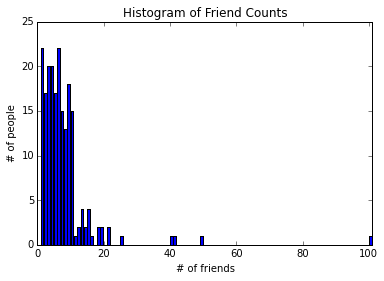

In [15]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

def make_friend_counts_histogram(plt):
    friend_counts = Counter(num_friends)
    xs = range(101)
    xs = range(101)
    ys = [friend_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0,101,0,25])
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends")
    plt.ylabel("# of people")
    plt.show()

import matplotlib as plt
%pylab inline

make_friend_counts_histogram(plt)

In [16]:
num_points = len(num_friends)               # 204
largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49

# 중심 경향성 (central tendency)

데이터의 중심이 어디 있는지 나타내는 지표로 대부분 평균을 사용함

In [17]:
# this isn't right if you don't from __future__ import division
# python3+ 에서는 위의 모듈을 import 할 필요가 없음
def mean(x): 
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

In [18]:
np.mean(num_friends)


7.333333333333333

In [19]:
# 데이터의 중앙에 있는 값(홀수) 또는 중앙에 있는 두 값의 평균(짝수)
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # 데이터 포인트 개수가 홀수면 중앙값을 반환
        return sorted_v[midpoint]
    else:
        # 데이터 포인트의 개수가 짝수면 두 중앙값 평균을 반환
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
median(num_friends)

6.0

In [20]:
np.median(num_friends)


6.0

# 이상치 Outlier 검출

이상치 : 속성의 값이 일반적인 값보다 편차가 큰 값

이상치 검출 방법

-Variance : 정규분포에서 97.5% 이상 또는 2.5%의 이하에 포함되는 값을 이상치로 판별

-Likelihood  : 베이즈 정리에 의해 데이터 셋이 가지는 두가지 샘플(정상/이상)에 대한 발생 확률(Likelihood)로 이상치 판별

-Nearest-neighbor : 모든 데이터 쌍의 거리를 계산하여 이상치 검출

-Density : 샘플의 LOF(local outlier factor)를 계산하여 값이 가장 큰 데이터를 이상치로 추정, 밀도있는 데이터 셋으로 부터 먼 데이터

-Clustering : 데이터를 여러 클러스터로 구분한 후 작은 크기의 클러스터나 클러스터사이의 거리를 계산하여 먼 경우 해당 클러스터를 
                    이상치로 판별 


# 이상치 대체Outlier Replacement

1) 하한값과 상한값을 결정한 후 하한값보다 적으면 하한값으로 대체, 상한값보다 크면 상한값으로 대체함

2) 평균의 표준편차 
    하한값 = 평균 - n*표준편차, 상한값 = 평균 + n*표준편차  일반적으로 3시그마 (99.7% 이상 혹은 이하값을 이상치로 제거하거나 대체)

3) 평균 절대 편차
    중위수로부터 n편차 큰 값을 대체

4) 극 백분위수 
    상위 p번째 백분위수보다 큰 값을 대체

# Quantile 4분위수 

분위수는 모집단 혹은 표본의 전체 도수를 몇 등분한 것이다. 

- Q1는 Lower quantile 

- Q2는 Median 

- Q3는 Upper quantile 이라고 부른다.

In [21]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

for i in range(0, 100, 25):
    print("%.2f Percentage value" % (i*0.01) , quantile(num_friends, i * 0.01))

0.00 Percentage value 1
0.25 Percentage value 3
0.50 Percentage value 6
0.75 Percentage value 9


In [22]:
np.percentile(num_friends, [i for i in range(0,100,25)])


array([ 1.,  3.,  6.,  9.])

# 최빈값 (데이터에서 가장 자주 나오는 값)

In [23]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

mode(num_friends)

[1, 6]

# 산포도

- 데이터가 얼마나 퍼져 있는지를 나타냄

- 0과 근접하면 거의 퍼져 있지 않다는 의미 

- 큰 값이면 매우 퍼져 있다는 통계치

In [24]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

In [25]:
np.max(num_friends) - np.min(num_friends)


99

# 분산 

- 편차라는 것은 변량에서 평균을 뺀 값이다. 편차의 총합은 항상 0이 됨

- 분산은 이런 편차의 제곱의 평균이다. 편차의 합이 0 이므로 편차의 평균은 항상 0 

- 편차는 음수와 0, 양수가 섞여 있어서 편차의 평균으로는 산포도를 알 수 없어서 양수만 나오게 하여 산포도를 구하는 것 

In [26]:
# Mean - value
def de_mean(x):
    """x의 모든 데이터 포인트에서 평균을 뻼 (평균을 0으로 만들기 위해서)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """x에 두 개 이상의 데이터 포인트가 존재한다고 가정"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

81.543513957307155

In [27]:
%timeit np.var(num_friends)
%timeit variance(num_friends) # 일반적인 분산 연산도 numpy가 빠름

10000 loops, best of 3: 120 µs per loop
1000 loops, best of 3: 321 µs per loop


# 표준편차 (standard deviation)

- 자료의 산포도를 나타내는 수치 
- 분산의 음이 아닌 제곱근으로 정의 됨 
- 표준편차가 작을 수록 평균 값에서 변량들의 거리가 가깝다.



In [28]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

In [29]:
np.std(num_friends, dtype=np.float64) 


9.0079848384460117

# 사분범위

- 3사분위수에서 1사분위수간의 거리를 반으로 나눈 값 
- 사분범위가 크면 보다 흩어진 분포이고 작으면 밀집된 분포임을 알 수 있다.

    (자료의 극단적인 값에 대한 영향을 덜 받는 다는 장점이 있다.) 

In [39]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

# 상관관계 

 (1) 상관관계 : 두 변량 x, y에 있어서 x의 변화와 y의 변화 사이에 어떤 관계가 있을 때, 이러한 관계를 상관관계라 하고, 두 변량 x, y 사이에는 상관관계가 있다고 한다.

 (2) 상관관계의 분류
- 양의 상관관계 : 두 변량 x, y 사이에 x의 값이 커짐에 따라 y의 값도 대체로 커지는 관계
- 음의 상관관계 : 두 변량 x, y 사이에 x의 값이 커짐에 따라 y의 값은 대체로 작아지는 관계
- 상관관계가 없다 : 두 변량 x, y 사이에 x의 값이 커짐에 따라 y의 값이 커지는지 작아지는지 분명하지 않은 관계

In [31]:
####
#
# CORRELATION
#
#####

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

# 공분산 

두 변수가 각각의 평균에서 얼마나 떨어져 있는지 확인할 수 있음

In [32]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends,daily_minutes)

22.425435139573057

In [33]:
np.cov(num_friends,daily_minutes)


array([[  81.54351396,   22.42543514],
       [  22.42543514,  100.78589895]])

In [34]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # 편차가 존재하지 않는다면 상관관계는 0 
    
correlation(num_friends, daily_minutes)

0.24736957366478204

In [35]:
np.corrcoef(num_friends, daily_minutes)


array([[ 1.        ,  0.24736957],
       [ 0.24736957,  1.        ]])

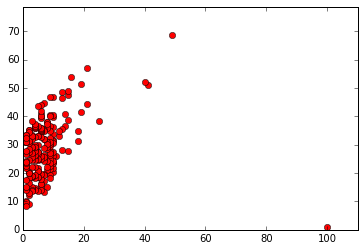

In [38]:
plt.plot(num_friends, daily_minutes, 'ro')
plt.axis([0,max(num_friends)+10,0,max(daily_minutes) +10 ])
plt.show()

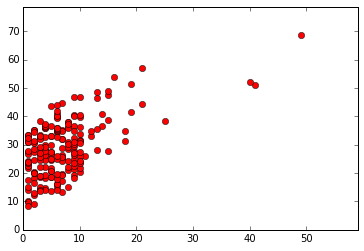

In [40]:
outlier = num_friends.index(100) # 이상치 제거 

num_friends_good = [x 
                    for i, x in enumerate(num_friends) 
                    if i != outlier]

daily_minutes_good = [x 
                      for i, x in enumerate(daily_minutes) 
                      if i != outlier]

plt.plot(num_friends_good, daily_minutes_good, 'ro')
plt.axis([0,max(num_friends_good)+10,0,max(daily_minutes_good) +10 ])
plt.show()